# Digital image

### Color Image

Color | RGB value   |
-------|:------------------|
Red  | 255, 0, 0   | 
Orange | 255, 128, 0  | 
Pink  | 255, 153, 255 | 


### OpenCV imread
retval	=	cv.imread(	filename[, flags]	)

In the case of color images, the decoded images will have the channels stored in B G R order.

[cv.imread()](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)

![](https://i.imgur.com/qHhzwqQ.png)


### matplotlib.pyplot.imshow
(X,cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)

(M, N, 3): an image with RGB values (0-1 float or 0-255 int).

(M, N, 4): an image with RGBA values (0-1 float or 0-255 int),  i.e. including transparency

![image.png](https://i.imgur.com/Sl4fkuJ.png)



<function matplotlib.pyplot.show(close=None, block=None)>

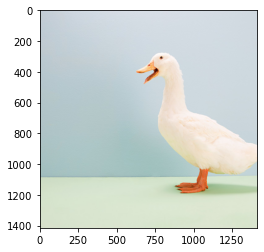

In [69]:
from IPython.display import display
from PIL import Image
from  matplotlib import pyplot as plt
import cv2
import numpy as np
image = cv2.imread('C:\DUCK.jpg')
image = image[:,:,::-1]
plt.imshow(image)
plt.show

In [70]:
print(image.shape) #picutre shape
print(image[100,150]) #one pixel color space

(1414, 1414, 3)
[201 210 217]


# 7 image point processing

At 2. introduction to Computer Vision (p.7)

![image.png](https://i.imgur.com/D2amXGP.jpg)

In [71]:
image_list = []
pros_list = [] #什麼意思 #用來儲存每張圖片的 image 跟 title

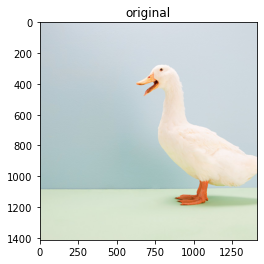

In [72]:
img1 = image.copy()
plt.imshow(img1)
plt.title('original')
plt.show
image_list.append(img1)
pros_list.append('original')

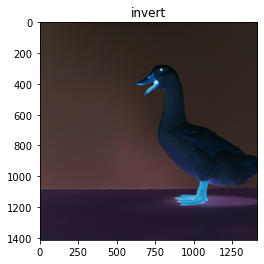

In [73]:
img2 = np.copy(image)
img2[0:1414,0:1414,0:3]=255-img2[0:1414,0:1414,0:3]
plt.imshow(img2)
plt.title('invert')
plt.show
image_list.append(img2)
pros_list.append('invert')

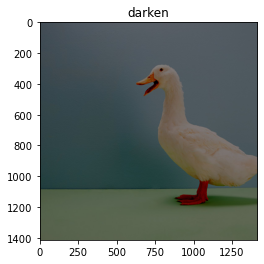

In [74]:
img3 = np.copy(image)
#img2[0:1414,0:1414,0:3]-=128
#img2-=128
"""
if img2[0:1414,0:1414,0:3]<=128 : 造成ambiguous原因 其中幾個有符合就正確嗎? 
    img2=0
"""
img3[img3<=128]=0   #小於等於128歸0 
img3[img3>128]-=128 #大於128進行運算
plt.imshow(img3)
plt.title('darken')
plt.show
image_list.append(img3)
pros_list.append('darken')

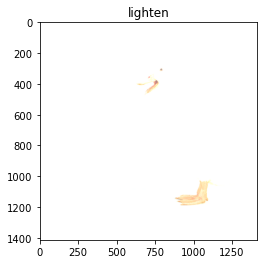

In [75]:
img4 = np.copy(image)
#img5[0:1414,0:1414,0:3]+=128
img4[img4>127]=255
img4[img4<=127]+=128
plt.imshow(img4)
plt.title('lighten')
plt.show
image_list.append(img4)
pros_list.append('lighten')

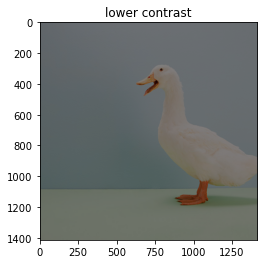

In [76]:
import math
img5 = np.copy(image)
img5[0:1414,0:1414,0:3]//=2
#img3/=2 有什麼差別
plt.imshow(img5)
plt.title('lower contrast')
plt.show
image_list.append(img5)
pros_list.append('lower contrast')

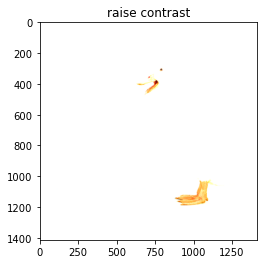

In [77]:
img6 = np.copy(image)
#img4[0:1414,0:1414,0:3]*=2
img6[img6>127]=255
img6[img6<=127]*=2
plt.imshow(img6)
plt.title('raise contrast')
plt.show
image_list.append(img6)
pros_list.append('raise contrast')

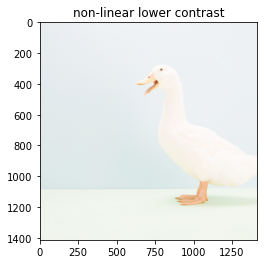

In [78]:
img7 = image.copy()
#img_4 //= 255
#print(img_4)
img7 = np.power(img7/255,0.333)
img7[img7>1]=255
img7[img7<=1]*=255
#img_4.astype(int)
img7 = np.int_(img7)
plt.imshow(img7)
plt.title('non-linear lower contrast')
plt.show
#print(img_4)
image_list.append(img7)
pros_list.append('non-linear lower contrast')

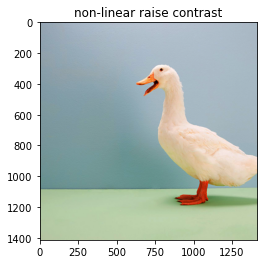

In [79]:
img8 = image.copy()
img8 = np.power(img8/255,2)
img8[img8>1]=255
img8[img8<=1]*=255
img8 = np.int_(img8)
plt.imshow(img8)
plt.title('non-linear raise contrast')
plt.show
image_list.append(img8)
pros_list.append('non-linear raise contrast')

In [80]:
len(image_list),len(pros_list)

(8, 8)

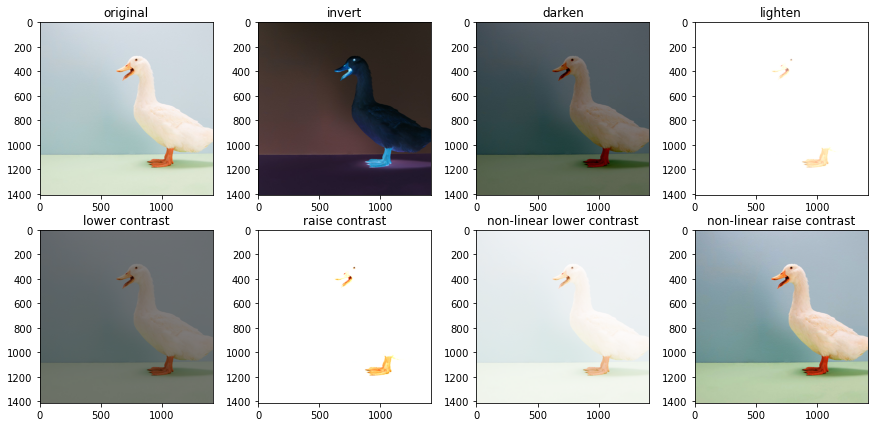

In [81]:
fig = plt.figure(figsize=(15,7))
rows = 2
cols = 4
for i in range(1,9):
    fig.add_subplot(rows,cols,i)
    plt.title(pros_list[i-1])
    plt.imshow(image_list[i-1])

# Filter

## Gaussian filter
### Opencv Library

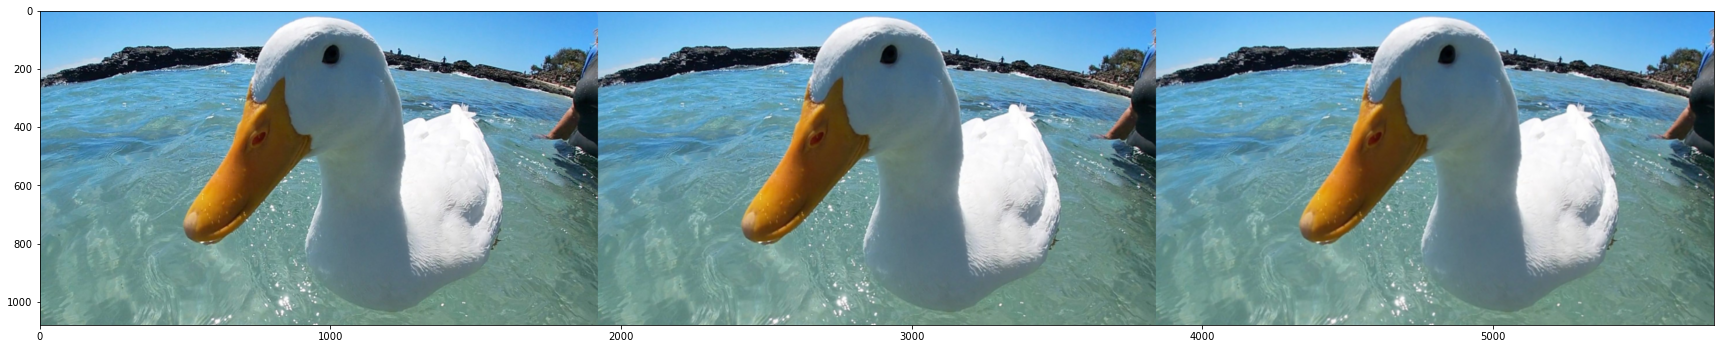

In [82]:
image = cv2.imread('C:\DUCK1.jpg')
fig = plt.figure(figsize=(30,40))
blurred = np.hstack([cv2.GaussianBlur(image,(3,3),0)[:,:,::-1],
                     cv2.GaussianBlur(image,(5,5),0)[:,:,::-1],
                     cv2.GaussianBlur(image,(7,7),0)[:,:,::-1]
                     ])
cv2.imwrite("Gaussian.jpg",blurred[:,:,::-1])
plt.imshow(blurred)
plt.show()

## Step1 : Get filter kernel

![image.png](https://i.imgur.com/oh9HkZA.png)

[OpenCV getGaussianKernel]
(https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))

### getGaussianKernel(int ksize, double sigma, int ktype=CV_64F )

### Parameters:	
**ksize** – Aperture size. It should be odd ( $ksize\ mod\ 2 = 1$) and positive.

**sigma** – Gaussian standard deviation. If it is non-positive, it is computed from ksize as $\ \ sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8$

**ktype** – Type of filter coefficients. It can be CV_32f or CV_64F .

$G_i = \alpha * e^{(-i-(ksize-1)/2)^2/(2*sigma^2)},$

$where\ i = 0 \sim ksize-1,\ and\ \alpha\ is\ the\ scale\ factor\ chosen\ so\ that \sum_iG_i=1$

C:\Users\David\anaconda3\envs\tf_2.0\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  import sys


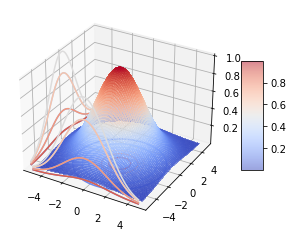

In [83]:
sigma = 2 #下面題目有要求 為甚麼這邊會有
from matplotlib.ticker import LinearLocator , FormatStrFormatter
from matplotlib import cm
from matplotlib import animation
from IPython.display import HTML
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X,Y)
Z = np.exp(-(X**2+Y**2)/(2*sigma**2))
surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap=cm.coolwarm,linewidth=0, antialiased=False,alpha=0.5)
cset = ax.contour(X, Y, Z, zdir='z', offset=-0.1, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-5.5, cmap=cm.coolwarm) 
cset = ax.contour(X, Y, Z, zdir='y', offset=-5.5, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show() #可有可無????

In [84]:
import math
#sigma=0.3∗((ksize−1)∗0.5−1)+0.8
def GaussiaFilter(KernalSize):
    sigma = 0.3*((KernalSize-1)*0.5-1)+0.8
    kernel =[]
    total = 0 #各係數相加後總值
    for i in range(0,KernalSize):
        for j in range(0,KernalSize):
            a = pow(i-(KernalSize-1)/2,2)
            b = pow(j-(KernalSize-1)/2,2)
            g = math.exp(-(a+b) / (2*sigma*sigma))
            g /= 2*math.pi*sigma
            kernel.append(g)
            total += g
    return np.array(kernel)/total        

row,col,_=image.shape
KernalSize=15
Gaussian_Kernel=GaussiaFilter(KernalSize)
print('Sum of filter :',np.sum(Gaussian_Kernel))
Gaussian_Kernel = np.reshape(Gaussian_Kernel , (15,15))
#print(Gaussian_Kernel)
#這是動態陣列 所以不能給予索引直
#所以kernel[i+j]是錯誤的 要用append

Sum of filter : 0.9999999999999996


## Step 2 : Convolution


[The difference between convolution and cross-correlation from a signal-analysis point of view](https://dsp.stackexchange.com/questions/27451/the-difference-between-convolution-and-cross-correlation-from-a-signal-analysis)

[Border type](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)

![](https://i.imgur.com/qEYv2fV.png)
![](https://i.imgur.com/SGeFKLD.png)

(1080, 1920, 3)


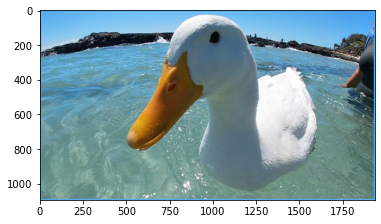

In [85]:
#增加padding 周圍賦常數值
img = cv2.imread('C:\DUCK1.jpg')
ht, wd ,cc = img.shape
print (img.shape)
ww = 1934
hh = 1094
color = img[0][0]
result = np.full((hh,ww,cc),color,dtype=np.uint8)
plt.imshow(result[:,:,::-1])
xx = (ww-wd)//2
yy = (hh-ht)//2
result[yy:yy+ht, xx:xx+wd] = img
plt.imshow(result[:,:,::-1])

In [86]:
b,g,r = cv2.split(result)

In [87]:
#Convolution
resx=np.zeros((hh,ww,3),np.uint8) #initial a result image
#resx=np.zeros((row-int((KernalSize-1)/2),col-int((KernalSize-1)/2),3),np.uint8) #initial a result image
middle = (KernalSize-1)//2
for x in range(row):
    for y in range(col):
            bb = b[x:x+KernalSize,y:y+KernalSize]*Gaussian_Kernel
            gg = g[x:x+KernalSize,y:y+KernalSize]*Gaussian_Kernel
            rr = r[x:x+KernalSize,y:y+KernalSize]*Gaussian_Kernel
            bb = np.sum(bb)
            gg = np.sum(gg)
            rr = np.sum(rr)
            t = cv2.merge([rr,gg,bb])
            t = np.int_(t)
            resx[x+middle,y+middle] = t[0,0]

In [88]:
res=np.zeros((row,col,3),np.uint8) #initial a result image
res=resx[0:row,0:col]

## Step3 Result

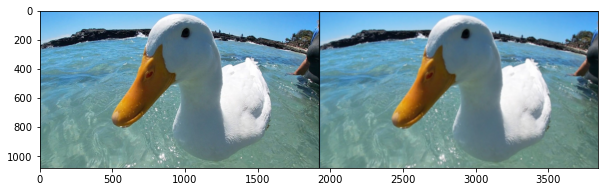

In [89]:
fig = plt.figure(figsize=(10,20))
G_res = np.hstack([image[:,:,::-1],res])
plt.imshow(G_res)
cv2.imwrite("Gaussian_H.jpg",G_res[:,:,::-1]) 
plt.show()

# Downsampling

![](https://i.imgur.com/0zrrdKy.png)

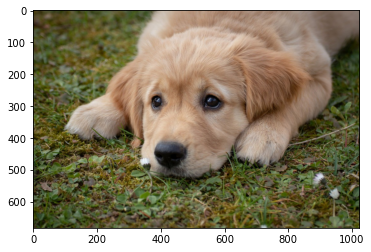

In [90]:
img = cv2.imread('C:/DOG.jpg')
b,g,r = cv2.split(img)
img_RGB = cv2.merge([r,g,b])
plt.imshow(img_RGB)
plt.show()

In [91]:
import math

In [92]:
def DownSamplingFunction(src,samplingScale):
    [row,col,depth]=src.shape
    #新圖片大小為:newrow=row*samplingScale  newcol=col*samplingScale
    dst=np.zeros((math.floor(row*samplingScale),math.floor(col*samplingScale),depth), np.uint8)
    #a = int(1/samplingScale/2)
    b = int(1/samplingScale)
    for x in range(math.floor(row*samplingScale)):
        for y in range(math.floor(col*samplingScale)):
            for i in range(b):
                for j in range(b):
                    if(y*b+i>col and x*b+i>row):
                        dst[x,y] = np.copy(src[row-1,col-1])
                    elif(y*b+i>col-1):
                        dst[x,y] = np.copy(src[x*b+i,col-1])
                    elif(x*b+i>row-1):
                        dst[x,y] = np.copy(src[row-1,y*b+j])
                    else:
                        dst[x,y] = np.copy(src[x*b+i,y*b+j])
            #total = [0,0,0]
    return dst
'''def DownSamplingFunction(src,samplingScale):
    [row,col,depth]=src.shape
    #新圖片大小為:newrow=row*samplingScale  newcol=col*samplingScale
    dst=np.zeros((round(row*samplingScale),round(col*samplingScale),depth), np.uint8)
    #a = int(1/samplingScale/2)
    b = int(1/samplingScale)
    for x in range(round(row*samplingScale)):
        for y in range(round(col*samplingScale)):
            for i in range(b):
                for j in range(b):
                    if(y*b+i>col and x*b+i>row):
                        dst[x,y] = np.copy(src[row-1,col-1])
                    elif(y*b+i>col-1):
                        dst[x,y] = np.copy(src[x*b+i,col-1])
                    elif(x*b+i>row-1):
                        dst[x,y] = np.copy(src[row-1,y*b+j])
                    else:
                        dst[x,y] = np.copy(src[x*b+i,y*b+j])
            #total = [0,0,0]
    return dst'''

'def DownSamplingFunction(src,samplingScale):\n    [row,col,depth]=src.shape\n    #新圖片大小為:newrow=row*samplingScale  newcol=col*samplingScale\n    dst=np.zeros((round(row*samplingScale),round(col*samplingScale),depth), np.uint8)\n    #a = int(1/samplingScale/2)\n    b = int(1/samplingScale)\n    for x in range(round(row*samplingScale)):\n        for y in range(round(col*samplingScale)):\n            for i in range(b):\n                for j in range(b):\n                    if(y*b+i>col and x*b+i>row):\n                        dst[x,y] = np.copy(src[row-1,col-1])\n                    elif(y*b+i>col-1):\n                        dst[x,y] = np.copy(src[x*b+i,col-1])\n                    elif(x*b+i>row-1):\n                        dst[x,y] = np.copy(src[row-1,y*b+j])\n                    else:\n                        dst[x,y] = np.copy(src[x*b+i,y*b+j])\n            #total = [0,0,0]\n    return dst'

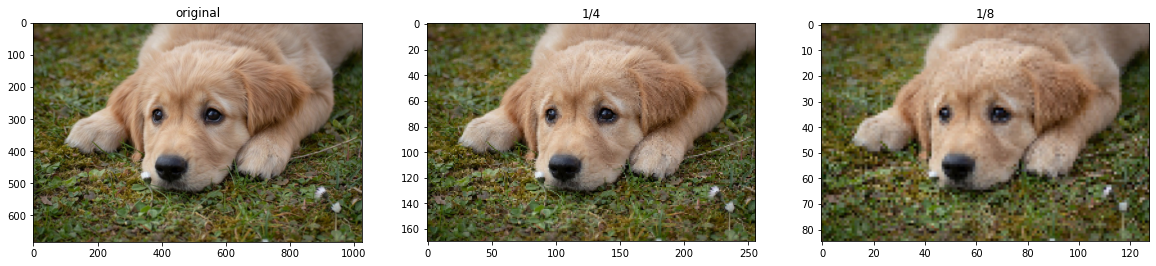

In [93]:
img_1_4 = DownSamplingFunction(img,1/4)
img_1_8 = DownSamplingFunction(img,1/8)
fig = plt.figure(figsize=(20,10))
rows = 1
cols = 3

fig.add_subplot(rows,cols,1)
plt.title('original')
plt.imshow(img[:,:,::-1])

fig.add_subplot(rows,cols,2)
plt.title('1/4')
plt.imshow(img_1_4[:,:,::-1])

fig.add_subplot(rows,cols,3)
plt.title('1/8')
plt.imshow(img_1_8[:,:,::-1])

## Downsampling With Gaussian Filter (換一張圖 重做Gaussian Filter Convolution)

In [94]:
#增加padding 周圍賦常數值 
img = cv2.imread('C:\DOG.jpg')
row,col,_=img.shape
ht, wd ,cc = img.shape
#print (img.shape)
ww = 1038
hh = 698
color = img[0][0]
result = np.full((hh,ww,cc),color,dtype=np.uint8)
#plt.imshow(result[:,:,::-1])
xx = (ww-wd)//2
yy = (hh-ht)//2
result[yy:yy+ht, xx:xx+wd] = img
#plt.imshow(result[:,:,::-1])
b,g,r = cv2.split(result)

In [95]:
#Convolution
resx=np.zeros((hh,ww,3),np.uint8) #initial a result image
#resx=np.zeros((row-int((KernalSize-1)/2),col-int((KernalSize-1)/2),3),np.uint8) #initial a result image
middle = (KernalSize-1)//2
for x in range(row):
    for y in range(col):
            bb = b[x:x+KernalSize,y:y+KernalSize]*Gaussian_Kernel
            gg = g[x:x+KernalSize,y:y+KernalSize]*Gaussian_Kernel
            rr = r[x:x+KernalSize,y:y+KernalSize]*Gaussian_Kernel
            bb = np.sum(bb)
            gg = np.sum(gg)
            rr = np.sum(rr)
            t = cv2.merge([rr,gg,bb])
            t = np.int_(t)
            resx[x+middle,y+middle] = t[0,0]


<function matplotlib.pyplot.show(close=None, block=None)>

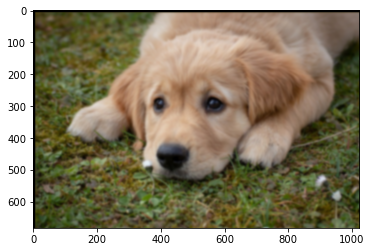

In [96]:
##Convolution
res=np.zeros((row,col,3),np.uint8) #initial a result image
res=resx[0:row,0:col]
plt.imshow(res)
plt.show

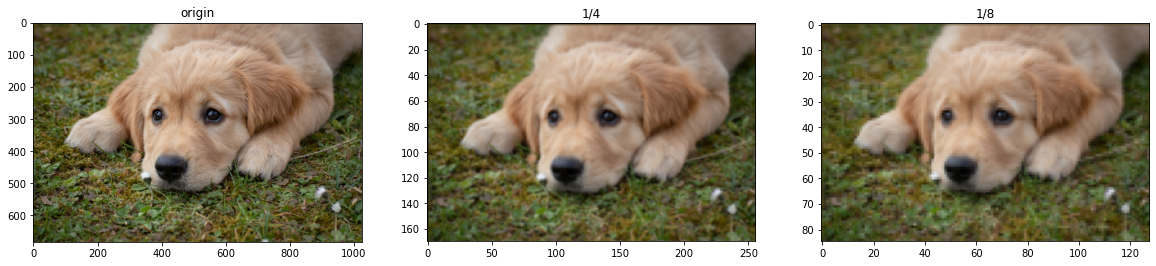

In [97]:
img_1_4g = DownSamplingFunction(res,1/4)
img_1_8g = DownSamplingFunction(res,1/8)
fig = plt.figure(figsize=(20,10))
rows = 1
cols = 3

fig.add_subplot(rows,cols,1)
plt.title('origin')
plt.imshow(img[:,:,::-1])

fig.add_subplot(rows,cols,2)
plt.title('1/4')
plt.imshow(img_1_4g[:,:,::])

fig.add_subplot(rows,cols,3)
plt.title('1/8')
plt.imshow(img_1_8g[:,:,::])

# Upsampling

Chosing the 1/8 downsampling picture for upsampling
using Nearest-neighbor interpolation

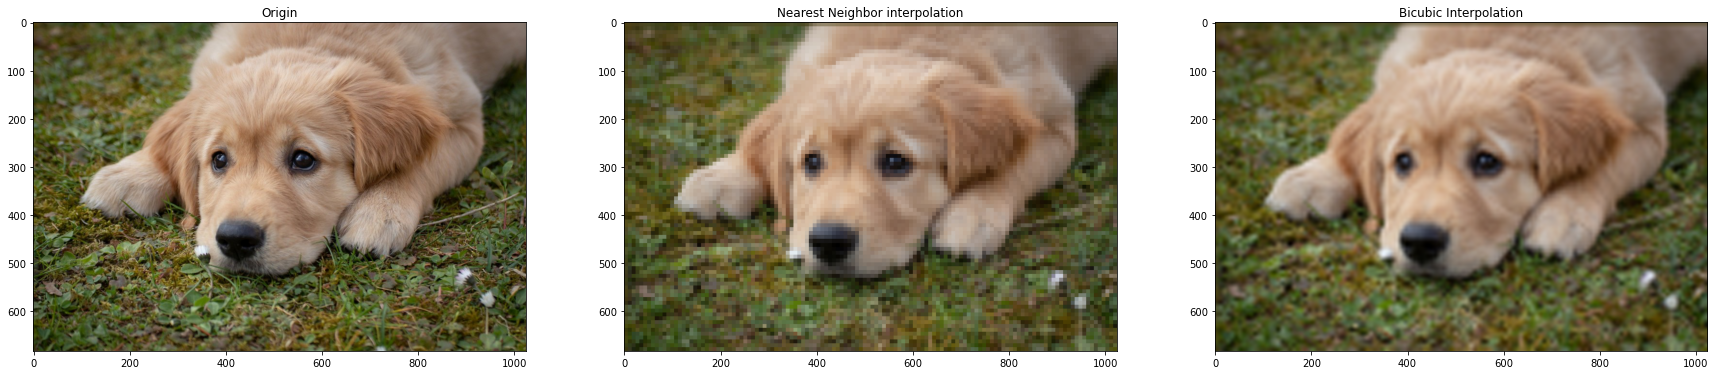

In [98]:
img_x,img_y,_ = img.shape
img_bic = cv2.resize(img_1_8g, (img_y,img_x), interpolation=cv2.INTER_CUBIC) #INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood
img_nn = cv2.resize(img_1_8g, (img_y,img_x),  interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(30,60))
plt.subplot(1,3,1)
plt.title('Origin')
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
plt.title('Nearest Neighbor interpolation')
plt.imshow(img_nn[:,:,::])
plt.subplot(1,3,3)
plt.title('Bicubic Interpolation')
plt.imshow(img_bic[:,:,::])
plt.show() 

In [99]:
def UpSamplingFunction(src,samplingScale):
    [row,col,depth]=src.shape
    dst=np.zeros((round(row*samplingScale),round(col*samplingScale),depth), np.uint8)
    for x in range(round(row)):
        for y in range(round(col)):
            for i in range(samplingScale):
                for j in range(samplingScale):
                    dst[x*samplingScale+i][y*samplingScale+j]= src[x][y]
    return dst

In [100]:
img_8_1n = UpSamplingFunction(img_1_8g,8)

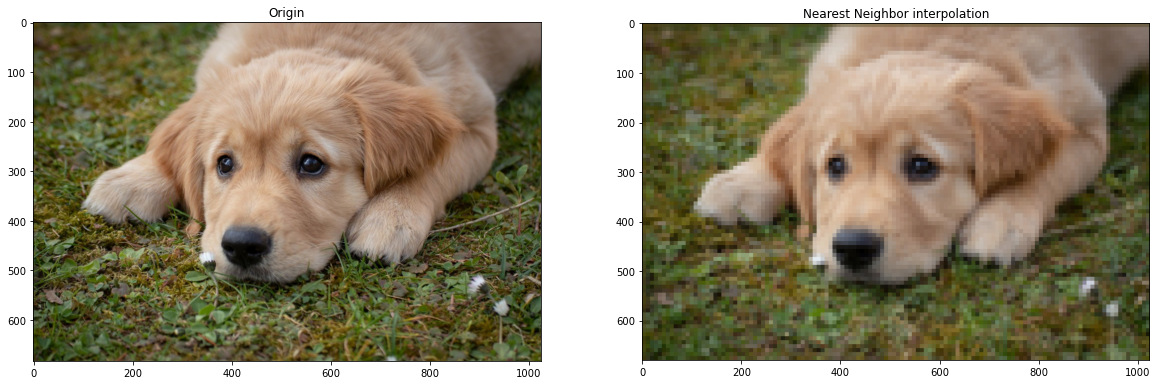

In [101]:
plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2)
plt.title('Nearest Neighbor interpolation')
plt.imshow(img_8_1n[:,:,::])

# Bicubic Interpolation
### [Bicubic Interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation)
![](https://i.imgur.com/0WMYL73.png)

![](https://i.imgur.com/tQTZhga.png)

In [102]:
def padding(img,H,W,C):
    zimg = np.zeros((H+4,W+4,C))
    zimg[2:H+2,2:W+2,:C] = img
    #Pad the first/last two col and row
    zimg[2:H+2,0:2,:C]=img[:,0:1,:C]
    zimg[H+2:H+4,2:W+2,:]=img[H-1:H,:,:]
    zimg[2:H+2,W+2:W+4,:]=img[:,W-1:W,:]
    zimg[0:2,2:W+2,:C]=img[0:1,:,:C]
    #Pad the missing eight points
    zimg[0:2,0:2,:C]=img[0,0,:C]
    zimg[H+2:H+4,0:2,:C]=img[H-1,0,:C]
    zimg[H+2:H+4,W+2:W+4,:C]=img[H-1,W-1,:C]
    zimg[0:2,W+2:W+4,:C]=img[0,W-1,:C]
    return zimg


In [103]:
def u(s,a):
    if(abs(s)>=0)&(abs(s)<=1):
        return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
    elif (abs(s)>1)&(abs(s)<=2):
        return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
    return 0
# Bicubic operation
def bicubic(img, ratio, a):
    #Get image size
    H,W,C = img.shape

    img = padding(img,H,W,C)
    #Create new image
    dH = math.floor(H*ratio)
    dW = math.floor(W*ratio)
    dst = np.zeros((dH, dW, 3))

    h = 1/ratio
    inc = 0
    for c in range(C):
        for j in range(dH):
            for i in range(dW):
                x, y = i * h + 2 , j * h + 2

                x1 = 1 + x - math.floor(x)
                x2 = x - math.floor(x)
                x3 = math.floor(x) + 1 - x
                x4 = math.floor(x) + 2 - x

                y1 = 1 + y - math.floor(y)
                y2 = y - math.floor(y)
                y3 = math.floor(y) + 1 - y
                y4 = math.floor(y) + 2 - y

                mat_l = np.matrix([[u(x1,a),u(x2,a),u(x3,a),u(x4,a)]])
                mat_m = np.matrix([[img[int(y-y1),int(x-x1),c],img[int(y-y2),int(x-x1),c],img[int(y+y3),int(x-x1),c],img[int(y+y4),int(x-x1),c]],
                                   [img[int(y-y1),int(x-x2),c],img[int(y-y2),int(x-x2),c],img[int(y+y3),int(x-x2),c],img[int(y+y4),int(x-x2),c]],
                                   [img[int(y-y1),int(x+x3),c],img[int(y-y2),int(x+x3),c],img[int(y+y3),int(x+x3),c],img[int(y+y4),int(x+x3),c]],
                                   [img[int(y-y1),int(x+x4),c],img[int(y-y2),int(x+x4),c],img[int(y+y3),int(x+x4),c],img[int(y+y4),int(x+x4),c]]])
                mat_r = np.matrix([[u(y1,a)],[u(y2,a)],[u(y3,a)],[u(y4,a)]])
                dst[j, i, c] = np.dot(np.dot(mat_l, mat_m),mat_r)
    return dst

# 影像梯度
* 一張影像的梯度即為他的偏微分
* np.dot即為兩矩陣相乘相加

In [104]:
img_8_1bicubic = bicubic(img_1_8g, 8, 0.5)

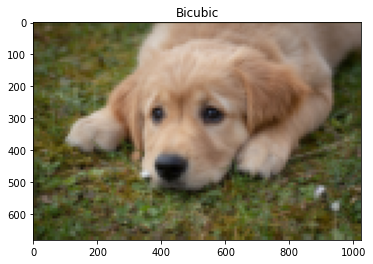

In [105]:
plt.title('Bicubic')
img_8_1bicubic = np.int_(img_8_1bicubic)
plt.imshow(img_8_1bicubic[:,:,::])